# Get started exploring names datasets
Suzanne Little    
suzanne.little@dcu.ie    
https://github.com/DiversityInData/Python-Workshops/tree/master/Visualisation    

In [1]:
# get the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Load the US Baby Names dataset

In [2]:
usn = pd.read_csv("../datasets/usnames.csv")

In [3]:
usn.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [4]:
usn.describe()

,births,year
count,1.924665e+06,1.924665e+06
mean,1.808733e+02,1.974851e+03
std,1.533337e+03,3.402948e+01
min,5.000000e+00,1.880000e+03
25%,7.000000e+00,1.951000e+03
50%,1.200000e+01,1.985000e+03
75%,3.200000e+01,2.003000e+03
max,9.968600e+04,2.017000e+03


In [5]:
usn[usn.births > 90000]

,name,sex,births,year
431064,Linda,F,99686,1947
437167,James,M,94756,1947
437168,Robert,M,91642,1947
441435,Linda,F,96209,1948
451674,Linda,F,91016,1949
533158,Michael,M,90620,1956
544620,Michael,M,92695,1957
556194,Michael,M,90520,1958


In [6]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
usn = usn.groupby(['year', 'sex']).apply(add_prop)

In [7]:
usn.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [8]:
usn.describe()

,births,year,prop
count,1.924665e+06,1.924665e+06,1.924665e+06
mean,1.808733e+02,1.974851e+03,1.434016e-04
std,1.533337e+03,3.402948e+01,1.206700e-03
min,5.000000e+00,1.880000e+03,2.319370e-06
25%,7.000000e+00,1.951000e+03,4.114752e-06
50%,1.200000e+01,1.985000e+03,7.748950e-06
75%,3.200000e+01,2.003000e+03,2.420624e-05
max,9.968600e+04,2.017000e+03,8.738268e-02


In [9]:
usn[usn.prop < 0.000003].count()

name      202818
sex       202818
births    202818
year      202818
prop      202818
dtype: int64

In [10]:
suzanne = usn[(usn.name == "Suzanne") & (usn.sex == "F")]
suzanne.describe()

,births,year,prop
count,137.000000,137.000000,137.000000
mean,1597.255474,1948.978102,0.000991
std,2080.319510,39.730057,0.001165
min,5.000000,1880.000000,0.000027
25%,77.000000,1915.000000,0.000075
50%,424.000000,1949.000000,0.000308
75%,2508.000000,1983.000000,0.001853
max,6855.000000,2017.000000,0.003786


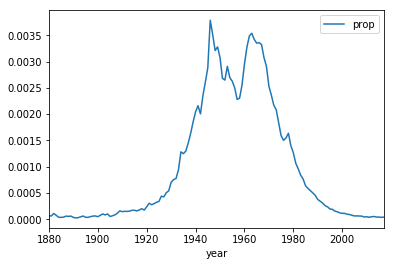

In [11]:
suzanne.plot(x='year', y='prop')

In [12]:
# boy named sue released 1969 ...
boysnamedsue = usn[((usn.name == "Sue") | (usn.name == "Suzanne") | (usn.name == "Susan")) & (usn.sex == "M")]
gb = boysnamedsue.groupby(by='year')['prop'].sum()

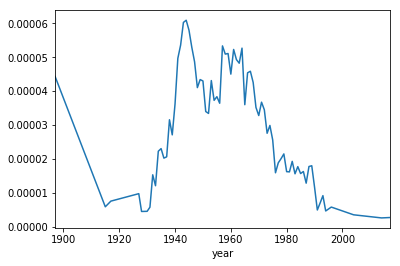

In [13]:
gb.plot()

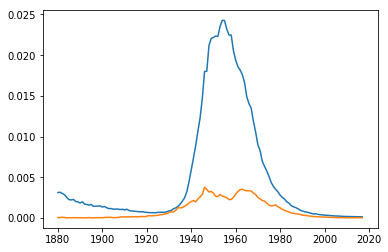

In [14]:
susan = usn[(usn.name == "Susan") & (usn.sex == "F")][['year', 'prop']]
plt.plot(susan.year, susan.prop)
plt.plot(suzanne.year, suzanne.prop)
plt.show()

In [15]:
import seaborn as sns; sns.set()

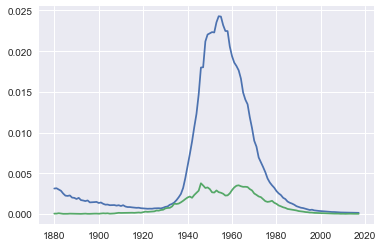

In [16]:
plt.plot(susan.year, susan.prop)
plt.plot(suzanne.year, suzanne.prop)
plt.show()

## Uniformity of names - how much variation?

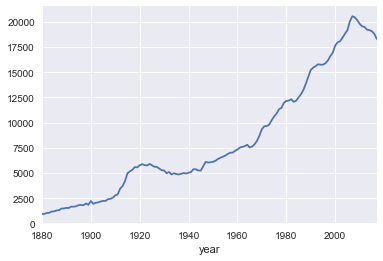

In [17]:
usn[usn.sex=="F"].groupby(['year'])['name'].count().plot()

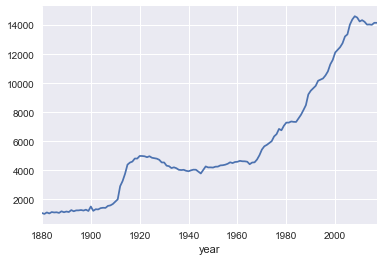

In [18]:
usn[usn.sex=="M"].groupby(['year'])['name'].count().plot()

In [19]:
variation = usn.groupby(['year', 'sex'])['name'].count()
variation.head()

year  sex
1880  F       942
      M      1058
1881  F       938
      M       997
1882  F      1028
Name: name, dtype: int64

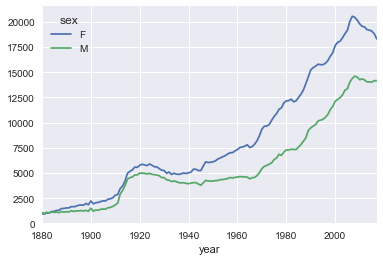

In [20]:
# this took ages to work out!
variation.unstack().plot()

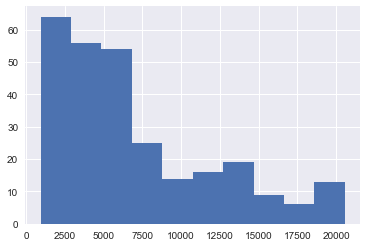

In [21]:
variation.hist()

## Trying to compare names used by both M & F

In [22]:
#usn.pivot_table('prop', index=['sex', 'name'], columns='year', aggfunc=sum)
F_names = usn[usn.sex=="F"].name
M_names = usn[usn.sex=="M"].name

In [23]:
both = np.intersect1d(F_names, M_names)

In [24]:
both.size

10663

In [25]:
both = pd.Series(both)

In [26]:
both.head()

0      Aaden
1       Aadi
2      Aadyn
3    Aalijah
4    Aaliyah
dtype: object

In [27]:
both = usn[usn.name.isin(both)]

In [28]:
both.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
